In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset

In [22]:
data = pd.read_csv('Iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [24]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [26]:
data["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [27]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [80]:
X = data.iloc[:, :-1]  
y = data.iloc[:, -1]   

# Scatter Plot

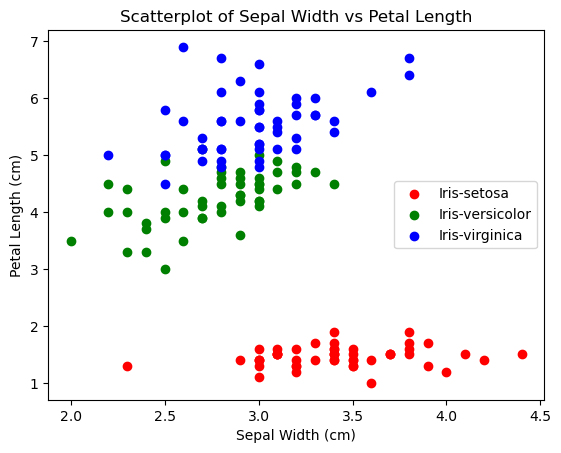

In [128]:
scatter_plot = data.plot(kind="scatter", x='SepalWidthCm', y='PetalLengthCm', alpha=0.7)

colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}

for species, color in colors.items():
    species_data = data[data['Species'] == species]
    scatter_plot.scatter(species_data['SepalWidthCm'], species_data['PetalLengthCm'], c=color, label=species)
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('Scatterplot of Sepal Width vs Petal Length')

plt.legend()

# Splitting the dataset into the Training set and Test set

In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [82]:
print(X_train)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
137  138            6.4           3.1            5.5           1.8
84    85            5.4           3.0            4.5           1.5
27    28            5.2           3.5            1.5           0.2
127  128            6.1           3.0            4.9           1.8
132  133            6.4           2.8            5.6           2.2
..   ...            ...           ...            ...           ...
9     10            4.9           3.1            1.5           0.1
103  104            6.3           2.9            5.6           1.8
67    68            5.8           2.7            4.1           1.0
117  118            7.7           3.8            6.7           2.2
47    48            4.6           3.2            1.4           0.2

[120 rows x 5 columns]


In [83]:
print(y_train)

137     Iris-virginica
84     Iris-versicolor
27         Iris-setosa
127     Iris-virginica
132     Iris-virginica
            ...       
9          Iris-setosa
103     Iris-virginica
67     Iris-versicolor
117     Iris-virginica
47         Iris-setosa
Name: Species, Length: 120, dtype: object


In [84]:
print(X_test)

      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
114  115            5.8           2.8            5.1           2.4
62    63            6.0           2.2            4.0           1.0
33    34            5.5           4.2            1.4           0.2
107  108            7.3           2.9            6.3           1.8
7      8            5.0           3.4            1.5           0.2
100  101            6.3           3.3            6.0           2.5
40    41            5.0           3.5            1.3           0.3
86    87            6.7           3.1            4.7           1.5
76    77            6.8           2.8            4.8           1.4
71    72            6.1           2.8            4.0           1.3
134  135            6.1           2.6            5.6           1.4
51    52            6.4           3.2            4.5           1.5
73    74            6.1           2.8            4.7           1.2
54    55            6.5           2.8            4.6          

In [85]:
print(y_test)

114     Iris-virginica
62     Iris-versicolor
33         Iris-setosa
107     Iris-virginica
7          Iris-setosa
100     Iris-virginica
40         Iris-setosa
86     Iris-versicolor
76     Iris-versicolor
71     Iris-versicolor
134     Iris-virginica
51     Iris-versicolor
73     Iris-versicolor
54     Iris-versicolor
63     Iris-versicolor
37         Iris-setosa
78     Iris-versicolor
90     Iris-versicolor
45         Iris-setosa
16         Iris-setosa
121     Iris-virginica
66     Iris-versicolor
24         Iris-setosa
8          Iris-setosa
126     Iris-virginica
22         Iris-setosa
44         Iris-setosa
97     Iris-versicolor
93     Iris-versicolor
26         Iris-setosa
Name: Species, dtype: object


# Training the Logistic Regression model on the Training set

In [86]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predicting a test set result

In [87]:
y_pred = classifier.predict(X_test)

In [88]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

# Predicting a new result

In [91]:
print(classifier.predict([[5.6,2.8,4.9,2.0,1.0]]))

['Iris-setosa']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Making the Confusion Matrix

In [104]:
print(metrics.confusion_matrix(expected, predicted))

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


# Accuracy

In [99]:
classifier.score(X,y)

1.0

# Make Predictions

In [103]:
expected = y
predicted = classifier.predict(X)
from sklearn import metrics
print(metrics.classification_report(expected, predicted))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       1.00      1.00      1.00        50
 Iris-virginica       1.00      1.00      1.00        50

       accuracy                           1.00       150
      macro avg       1.00      1.00      1.00       150
   weighted avg       1.00      1.00      1.00       150



# Regularization

In [105]:
model = LogisticRegression(C=20,penalty='l2' )
model.fit(X,y)
LogisticRegression(C=20)
model.score(X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


1.0